# Medical Insurance Cost Prediction using Linear Regression.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [3]:
data=pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Getting the number of rows and columns in the dataset.

In [4]:
data.shape

(1338, 7)

## Checking the null value in the dataset

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Getting some information about the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Getting the relation between the columns

In [7]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


## Visualizing age column

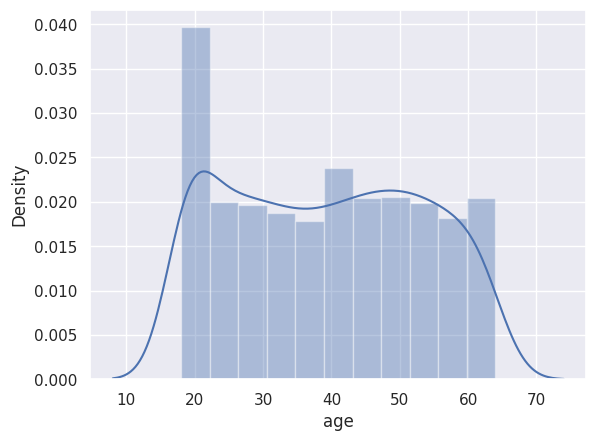

In [8]:
sns.set()
sns.distplot(data['age'])
plt.show()

## Visualizing Gender

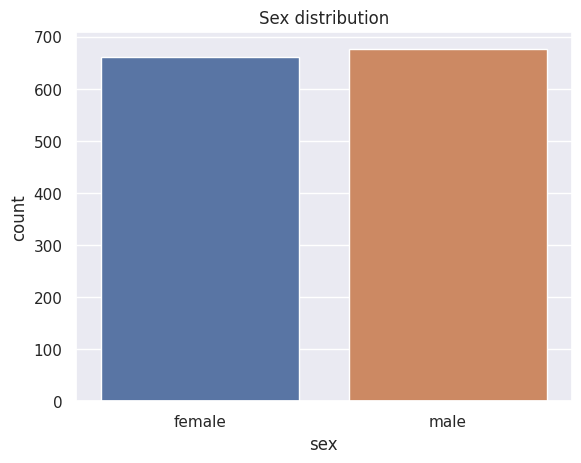

In [9]:
sns.countplot(x='sex',data=data)
plt.title('Sex distribution')
plt.show()

In [10]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

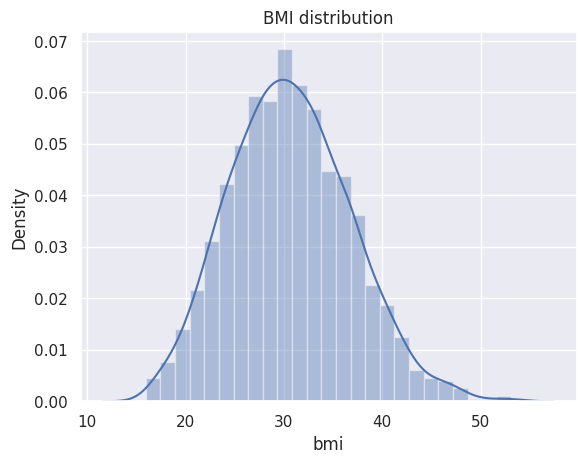

In [11]:
sns.distplot(data['bmi'])
plt.title('BMI distribution')
plt.show()

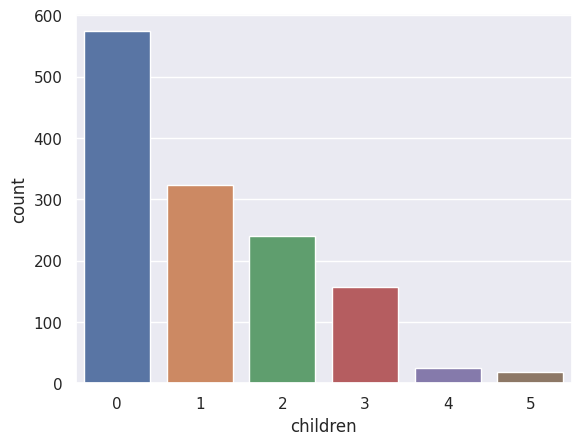

In [12]:
sns.countplot(x='children',data=data)
plt.show()

In [13]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


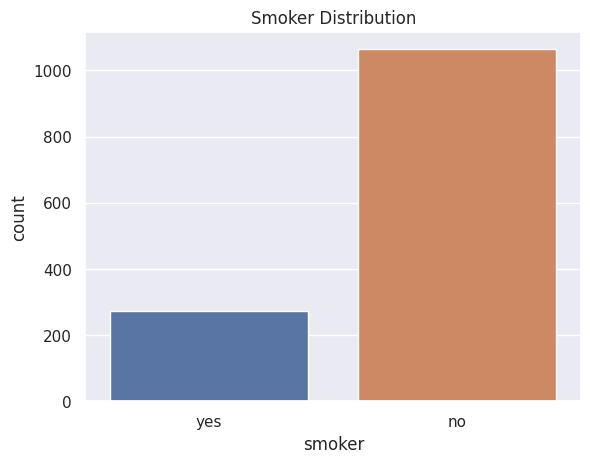

In [15]:
sns.countplot(x='smoker',data=data)
plt.title("Smoker Distribution")
plt.show()

In [16]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


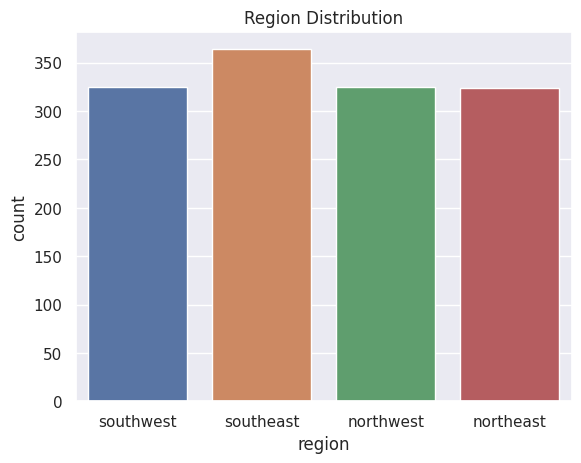

In [18]:
sns.countplot(x='region',data=data)
plt.title("Region Distribution")
plt.show()

In [19]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


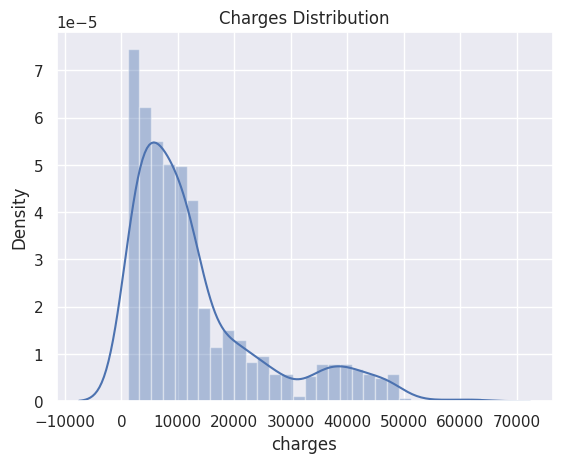

In [21]:
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

In [22]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [23]:
# encoding sex
data.replace({'sex':{'male':0,'female':1}},inplace=True)

# encoding smoker
data.replace({'smoker':{'yes':1,'no':0}},inplace=True)

# encoding region
data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [25]:
X=data.iloc[:,0:-1]
y=data['charges']

In [26]:
X.head(2)

,age,sex,bmi,children,smoker,region
0,19,1,27.90,0,1,1
1,18,0,33.77,1,0,0


In [27]:


y.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [28]:
# splitting the dataset into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:

print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (896, 6) (442, 6)


In [30]:
print(y.shape,y_train.shape,y_test.shape)

(1338,) (896,) (442,)


In [31]:
# model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
lr

LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
# model evaluation
y_pred=lr.predict(X_test)

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7604368059251493

In [36]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [37]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))

In [38]:
# Making the predicative model
#'southeast':0,'southwest':1,'northwest':2,'northeast':3
age=int(input("Enter your age:"))
sex=int(input("Enter your sex. (0 for male and 1 for female.)"))
bmi=float(input('Enter BMI:'))
children=int(input("Enter the number of children:"))
smoker=int(input("Are you smoker? (Enter 1 if you are smoker else 0.)"))
region=int(input('Which region are you from?\n Enter 0 if you are from southeast.\nEnter 1 for southwest\nEnter 2 for northwest\nEnter 3 for northeast. '))


input_data=(age,sex,bmi,children,smoker,region)

# converting the input_data into numpy array
numpy_array=np.asanyarray(input_data)

# shaping the numpy_array
numpy_array_shape=numpy_array.reshape(1,-1)

prediction=lr.predict(numpy_array_shape)

print(f'The charges is {prediction}')


Enter your age:28
Enter your sex. (0 for male and 1 for female.)0
Enter BMI:33
Enter the number of children:3
Are you smoker? (Enter 1 if you are smoker else 0.)0
Which region are you from?
 Enter 0 if you are from southeast.
Enter 1 for southwest
Enter 2 for northwest
Enter 3 for northeast. 2
The charges is [7241.81116614]


In [46]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))